In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import os
import itertools
from glob import glob
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
crack_positive='/content/drive/My Drive/Contact Information (File responses)/448/Cracks'
crack_negative='/content/drive/My Drive/Contact Information (File responses)/448/NonCracks'

In [4]:
crack_positive_df=pd.DataFrame(columns=('path','image','label'),index=np.arange(0,200))
crack_negative_df=pd.DataFrame(columns=('path','image','label'),index=np.arange(0,200))
imageid_path_dict_Negative = np.array([x for x in glob(os.path.join(crack_negative, '*.jpg'))])           #glob is used to get a list of images 
                                                                                                         #providing path for the dictonary in the drive
imageid_path_dict_Positive = np.array([x for x in glob(os.path.join(crack_positive, '*.jpg'))])

In [6]:
crack_negative_df['path']=imageid_path_dict_Negative # providing path for the new data frame
crack_negative_df['label']=0
crack_negative_df['image']=crack_negative_df['path'].map(lambda x: np.asarray(Image.open(x).resize((227,227)))) #changing the image size as the size of image for negative crack is 227*227 and for positive crack is 360*640 
# and storing it in a dataframe


In [7]:
crack_positive_df['path']=imageid_path_dict_Positive
crack_positive_df['label']=1
crack_positive_df['image']=crack_positive_df['path'].map(lambda x: np.asarray(Image.open(x).resize((227,227))))

In [8]:
print("Negative:",crack_negative_df["image"][0].shape)
print("Positive:",crack_positive_df["image"][0].shape)

Negative: (227, 227, 3)
Positive: (227, 227, 3)


In [9]:

print(imageid_path_dict_Negative.shape,imageid_path_dict_Positive.shape) 
crack_df = crack_negative_df.append(crack_positive_df)             #making a crack dataframe and adding colums of crack positive df
crack_df.reset_index(drop=True,inplace=True)
print(crack_df.shape)    

(200,) (200,)
(400, 3)


In [10]:
features=crack_df.drop(columns=['label'],axis=1)      
target=crack_df["label"]

In [11]:
x_train_o, x_test_o, y_train, y_test = train_test_split(features, target, test_size=0.30,random_state=14)       #splitting the dataset to test and train 


In [12]:
x_train = np.asarray(x_train_o['image'].tolist())          #converting the values to the array and then converting to list
x_test = np.asarray(x_test_o['image'].tolist())

In [13]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

In [14]:
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

In [15]:
x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [16]:
x_train = x_train.reshape(x_train.shape[0], *(227, 227, 3))
x_test = x_test.reshape(x_test.shape[0], *(227, 227, 3))


In [17]:
input_shape = (227, 227, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, validation_split=0.3,epochs=20, batch_size=50)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 227, 227, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 113, 113, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

In [18]:
history = model.history
print(history.history)

{'loss': [13.899651527404785, 1.9363138675689697, 0.6866228580474854, 0.6124521493911743, 0.566676914691925, 0.532014787197113, 0.49036383628845215, 0.46802592277526855, 0.4746114909648895, 0.3850890100002289, 0.3510113060474396, 0.32803964614868164, 0.2520785331726074, 0.28569623827934265, 0.21822308003902435, 0.216160386800766, 0.1947629451751709, 0.17456510663032532, 0.13719633221626282, 0.12634959816932678], 'accuracy': [0.48469388484954834, 0.5663265585899353, 0.48469388484954834, 0.4948979616165161, 0.581632673740387, 0.6989796161651611, 0.8214285969734192, 0.8367347121238708, 0.8163265585899353, 0.8571428656578064, 0.8724489808082581, 0.8622449040412903, 0.9030612111091614, 0.9285714030265808, 0.9438775777816772, 0.8928571343421936, 0.9642857313156128, 0.9846938848495483, 0.9642857313156128, 0.9591836929321289], 'val_loss': [3.043635845184326, 0.6172512769699097, 0.6084253191947937, 0.5574398636817932, 0.48017963767051697, 0.4537717401981354, 0.4356096386909485, 0.40559282898902

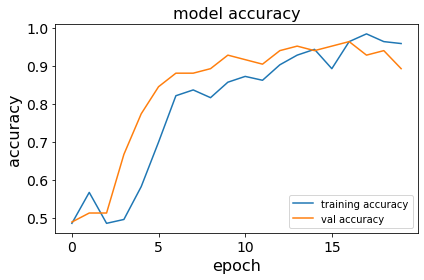

In [19]:
fig, ax = plt.subplots()

ax.plot(history.history['accuracy'],label='training accuracy')
ax.plot(history.history['val_accuracy'],label='val accuracy')

ax.set_title('model accuracy',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('accuracy',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

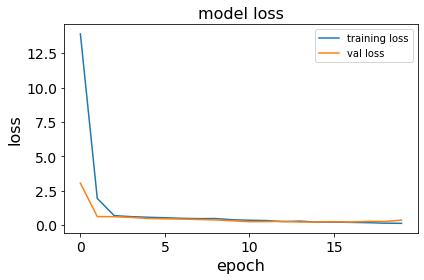

In [20]:
fig, ax = plt.subplots()

ax.plot(history.history['loss'],label='training loss')
ax.plot(history.history['val_loss'],label='val loss')

ax.set_title('model loss',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('loss',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()